# Load packages

In [1]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Load and Evaluate data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#data
dataset = read_csv('default of credit card clients.csv', header=1)
del dataset ['ID']
dataset.rename(columns = {'default payment next month':'default'}, inplace=True)

In [4]:
print(dataset.shape)

(30000, 24)


In [5]:
# types
set_option('display.max_rows', 500) 
print(dataset.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object


In [6]:
# head
set_option('display.width', 100) 
print(dataset.head(20))

    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5   ...     \
0       20000    2          2         1   24      2      2     -1     -1     -2   ...      
1      120000    2          2         2   26     -1      2      0      0      0   ...      
2       90000    2          2         2   34      0      0      0      0      0   ...      
3       50000    2          2         1   37      0      0      0      0      0   ...      
4       50000    1          2         1   57     -1      0     -1      0      0   ...      
5       50000    1          1         2   37      0      0      0      0      0   ...      
6      500000    1          1         2   29      0      0      0      0      0   ...      
7      100000    2          2         2   23      0     -1     -1      0      0   ...      
8      140000    2          3         1   28      0      0      2      0      0   ...      
9       20000    1          3         2   35     -2     -2     -2     -2     -1 

In [7]:
#descriptions
print(dataset.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE         PAY_0  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500     -0.016700   
std     129747.661567      0.489129      0.790349      0.521970      9.217904      1.123802   
min      10000.000000      1.000000      0.000000      0.000000     21.000000     -2.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000     -1.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000      0.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000      0.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5      ...           BILL_AMT4  \
count  30000.000000  30000.000000  30000.000000  3

In [8]:
# class distribution
print(dataset.groupby('default').size())

default
0    23364
1     6636
dtype: int64


Note that in this binary classification problem, the two classes are imbalanced with 'default' class in 22.1% of the observations. As a result evaluating models simply on the basis of the "Accuracy" metric will likely not be best course of action. We will look at Kappa and other metrics as well.

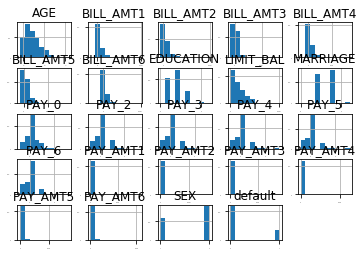

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

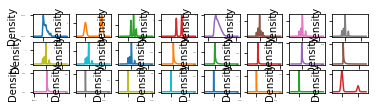

In [12]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()

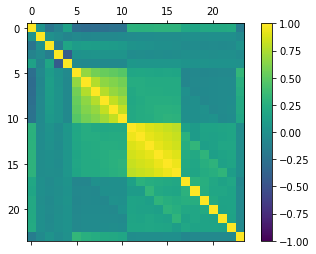

In [13]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
pyplot.show()

# Feature Selection

In [14]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
dataset = read_csv('default of credit card clients.csv', header=1)
del dataset ['ID']
dataset.rename(columns = {'default payment next month':'default'}, inplace=True)

array = dataset.values
X = array[:,0:23]
Y = array[:,23]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 9)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 9
Selected Features: [False  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False]
Feature Ranking: [11  1  1  1  1  1  1  1  1  1  2  6  5 12 15 10 14  3  4  8  7  9 13]


In [15]:
print(dataset.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object


In [16]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
array = dataset.values
X = array[:,0:23]
Y = array[:,23]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.06482784 0.00794627 0.02984652 0.02375205 0.06729602 0.08814974
 0.048358   0.03515055 0.02780102 0.03326669 0.03649473 0.05006971
 0.04612599 0.04589033 0.04406388 0.04440783 0.04438448 0.04550104
 0.04383519 0.0422426  0.04254865 0.0419222  0.04611868]


# Remove features

In [17]:
del dataset ['LIMIT_BAL']
del dataset ['BILL_AMT1']
del dataset ['BILL_AMT2']
del dataset ['BILL_AMT3']
del dataset ['BILL_AMT4']
del dataset ['BILL_AMT5']
del dataset ['BILL_AMT6']
del dataset ['PAY_AMT1']
del dataset ['PAY_AMT2']
del dataset ['PAY_AMT3']
del dataset ['PAY_AMT4']
del dataset ['PAY_AMT5']
del dataset ['PAY_AMT6']

In [18]:
print(dataset.dtypes)

SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
default      int64
dtype: object


In [19]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:10].astype(int)
Y = array[:,10]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

# Use 10-fold cross validation to estimate accuracy

In [20]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Build Models and evaluate algorithms 

In [28]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('SVM', SVC()))

# Train suite of algorithms and select best models. 

In [29]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.810476 (0.009861)
KNN: 0.795667 (0.010320)
SVM: 0.818476 (0.010858)


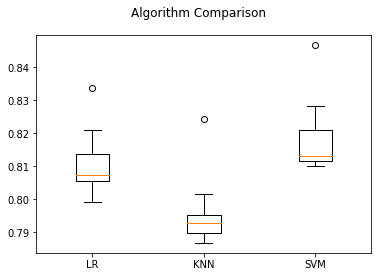

In [30]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [31]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())]))) 
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.810524 (0.010033)
ScaledKNN: 0.798952 (0.012873)
ScaledSVM: 0.821381 (0.011167)


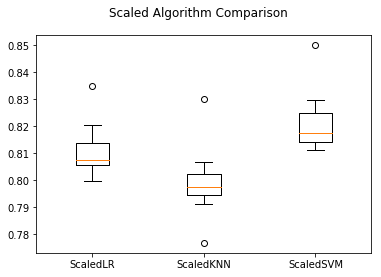

In [32]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [33]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,15,21,25]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.816762 using {'n_neighbors': 25}
0.734000 (0.013941) with: {'n_neighbors': 1}
0.813857 (0.010405) with: {'n_neighbors': 15}
0.816095 (0.010888) with: {'n_neighbors': 21}
0.816762 (0.011153) with: {'n_neighbors': 25}


In [34]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.5, 1.0, 1.5]
kernel_values = ['linear', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.821476 using {'C': 1.5, 'kernel': 'rbf'}
0.812238 (0.009810) with: {'C': 0.1, 'kernel': 'linear'}
0.820095 (0.011296) with: {'C': 0.1, 'kernel': 'rbf'}
0.811905 (0.009964) with: {'C': 0.5, 'kernel': 'linear'}
0.821286 (0.010733) with: {'C': 0.5, 'kernel': 'rbf'}
0.812238 (0.009829) with: {'C': 1.0, 'kernel': 'linear'}
0.821381 (0.011167) with: {'C': 1.0, 'kernel': 'rbf'}
0.811952 (0.009889) with: {'C': 1.5, 'kernel': 'linear'}
0.821476 (0.010951) with: {'C': 1.5, 'kernel': 'rbf'}


# Make Predictions

In [35]:
#Make Predictions with SVM
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)
predAccuracy = accuracy_score(Y_validation,predictions)
print('Accuracy: %.3f' % predAccuracy)
predKappa = cohen_kappa_score(Y_validation,predictions)
print('Kappa: %.3f' % predKappa)
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 0.813
Kappa: 0.344
[[6651  368]
 [1312  669]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.65      0.34      0.44      1981

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.74      0.64      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [38]:
#Make Predictions with KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions = KNN.predict(X_validation)
predAccuracy = accuracy_score(Y_validation,predictions)
print('Accuracy: %.3f' % predAccuracy)
predKappa = cohen_kappa_score(Y_validation,predictions)
print('Kappa: %.3f' % predKappa)
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 0.792
Kappa: 0.300
[[6457  562]
 [1308  673]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7019
           1       0.54      0.34      0.42      1981

   micro avg       0.79      0.79      0.79      9000
   macro avg       0.69      0.63      0.65      9000
weighted avg       0.77      0.79      0.77      9000



In [39]:
#LogisticRegression
#Make Predictions with LR
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions =LR.predict(X_validation)
predAccuracy = accuracy_score(Y_validation,predictions)
print('Accuracy: %.3f' % predAccuracy)
predKappa = cohen_kappa_score(Y_validation,predictions)
print('Kappa: %.3f' % predKappa)
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 0.810
Kappa: 0.273
[[6822  197]
 [1514  467]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7019
           1       0.70      0.24      0.35      1981

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

